In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
pip install ultralytics==8.2.82

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [7]:
pip install ultralytics==8.2.82

from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define the function to run YOLO model inference
def detect_skin_conditions(image_path, model_path="/content/models/best.pt"):
    # Load the model
    model = YOLO(model_path)

    # Run inference on the image
    results = model(image_path)

    # Define class names for each index
    names = {0: 'Mpox', 1: 'Normal', 2: 'Other'}

    # Iterate over each detection result
    for r in results:
        # Access the top1 probability index and confidence from results
        predicted_class_index = r.probs.top1
        predicted_class_score = r.probs.top1conf.item()

        # Get the name of the class using the predicted index
        predicted_class_name = names[predicted_class_index]

        # Print the predicted class and its confidence score
        print(f"Predicted Class: {predicted_class_name}, Score: {predicted_class_score:.4f}")

        # Plot the image with detection annotations
        im_bgr = r.plot()  # Get the image with detections plotted
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert BGR to RGB

        plt_image = im_rgb.convert("RGB")
        plt.figure(figsize=(5, 5))
        plt.imshow(plt_image)
        plt.axis("off")
        plt.show()


image 1/1 /content/mpox.png: 128x128 Mpox 0.91, Normal 0.09, Other 0.00, 139.4ms
Speed: 117.1ms preprocess, 139.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Predicted Class: Mpox, Score: 0.9094


100%|██████████| 755k/755k [00:00<00:00, 4.40MB/s]


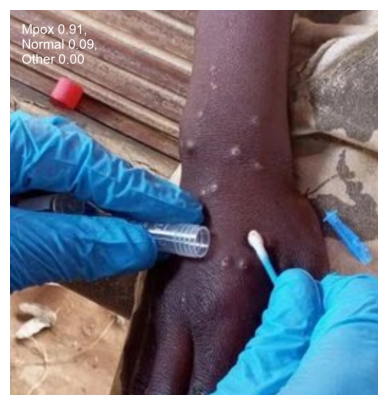

In [8]:
detect_skin_conditions("/content/test/mpox.png")


image 1/1 /content/normal.jpg: 128x128 Normal 1.00, Mpox 0.00, Other 0.00, 21.4ms
Speed: 50.4ms preprocess, 21.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Predicted Class: Normal, Score: 0.9985


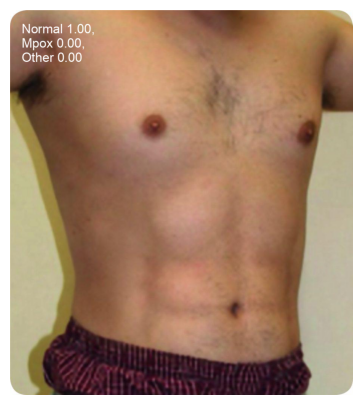

In [9]:
detect_skin_conditions("/content/test/normal.jpg")


image 1/1 /content/other.png: 128x128 Other 0.91, Normal 0.09, Mpox 0.00, 18.8ms
Speed: 4.0ms preprocess, 18.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Predicted Class: Other, Score: 0.9107


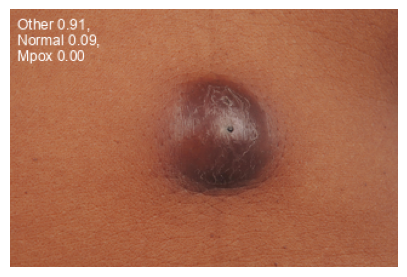

In [10]:
detect_skin_conditions("/content/test/other.png")